In [ ]:
result_path = "/Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/full_building_blocks/"
save_path = "/Users/alankaihassen/Development/diversity_mcts/repository/code/SPRS_WIP/results/visualizations"

data_info = {
    # retrostar
    "0_chembl_default_retrostar_0": result_path + "0_dpvn_ssm_chembl_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",
    "0_gdb17_default_retrostar_0": result_path + "0_dpvn_ssm_gdb17_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",
    "0_uspto190_default_retrostar_0": result_path + "0_dpvn_ssm_uspto190_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",
    
    # mcts
    "1_chembl_default_mcts": result_path + "1_dpvn_ssm_chembl_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules.hdf",
    "1_gdb17_default_mcts": result_path + "1_dpvn_ssm_gdb17_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    "1_uspto190_default_mcts": result_path + "1_dpvn_ssm_uspto190_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    
    # distance mcts
    "2_chembl_selection_distance_mcts": result_path + "2_dpvn_ssm_chembl_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    "2_gdb17_selection_distance_mcts": result_path + "2_dpvn_ssm_gdb17_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    "2_uspto190_selection_distance_mcts": result_path + "2_dpvn_ssm_uspto190_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    
    # expansion clustering retrostar
    "5_chembl_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_chembl_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",
    "5_gdb17_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_gdb17_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",
    "5_uspto190_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_uspto190_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf",

    # expansion clustering mcts
    "6_chembl_expansion_clustering_mcts": result_path + "6_dpvn_ssm_chembl_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    "6_gdb17_expansion_clustering_mcts": result_path + "6_dpvn_ssm_gdb17_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
    "6_uspto190_expansion_clustering_mcts": result_path + "6_dpvn_ssm_uspto190_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_depth_30.hdf",
}



In [7]:
# load data from hdf

import pandas as pd

def read_hdf(path):
    data = pd.read_hdf(path, key="table")
    # drop trees
    data = data.drop(columns=["trees"])
    profiling_df = pd.DataFrame(data["profiling"].tolist())
    data = pd.concat([data, profiling_df], axis=1)
    profiling_df = pd.DataFrame(data["policy_used_counts"].tolist())
    data = pd.concat([data, profiling_df], axis=1)
    
    return data

def calculate_solved_rate(df, maximum_expansion_calls = None):
    dataframe_length = len(df)
    if maximum_expansion_calls is not None:
        df = df[df["expansion_calls"] <= maximum_expansion_calls]
    solved_rate = df["is_solved"].sum() / dataframe_length
    return solved_rate

def calculate_solved_rate_based_on_iteration(df, maximum_iteration = None):
    dataframe_length = len(df)
    if maximum_iteration is not None:
        df = df[df["first_solution_iteration"] <= maximum_iteration]
    solved_rate = df["is_solved"].sum() / dataframe_length
    return solved_rate

selected_key = "6_chembl_expansion_clustering_mcts"
selected_df = read_hdf(data_info[selected_key])
selected_df

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,stock_info,top_scores,expansion_calls,reactants_generations,iterations,clustered_tree_width,tree_width,retrostar_mlp
0,0,CCN1CCN(Cc2ccc(NC(=O)c3ccc(C)c(C#Cc4coc5ccccc4...,6.141093,6.141049,1,11,3,4,8,2,...,{'retrostar_mlp': 10},"{'expansion_calls': 3, 'reactants_generations'...",{'CCN1CCN(Cc2ccc(N)cc2C(F)(F)F)CC1': ['emolecu...,"0.9940, 0.9866, 0.6774",3,0,1,"[4, 3, 4]","[24, 38, 27]",10
1,1,CCNC(=O)c1ccc2c(c1)NC(=O)C2=C(Nc1ccc(N(CCN(C)C...,12.314015,12.313953,1,21,4,7,17,1,...,{'retrostar_mlp': 20},"{'expansion_calls': 4, 'reactants_generations'...","{'CC(=O)Cl': ['emolecules'], 'CCN': ['emolecul...","0.9750, 0.7491, 0.7375",4,0,1,"[4, 7, 4, 5]","[25, 49, 41, 45]",20
2,2,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(...,4.554372,4.554316,1,8,2,4,6,1,...,{'retrostar_mlp': 7},"{'expansion_calls': 2, 'reactants_generations'...","{'CC(C)(C)C=O': ['emolecules'], 'COc1cc(N2CCN(...","0.9940, 0.6774, 0.6774, 0.6774",2,0,1,"[3, 4]","[14, 19]",7
3,3,O=C1c2cc(OCCC3CCN(Cc4ccc(C5=NCCN5)cc4)CC3)ccc2...,16.069262,16.069200,1,37,3,8,31,1,...,{'retrostar_mlp': 36},"{'expansion_calls': 6, 'reactants_generations'...","{'Cc1ccc(S(=O)(=O)Cl)cc1': ['emolecules'], 'OC...","0.9866, 0.8282, 0.8282, 0.8282, 0.8282",6,0,1,"[7, 7, 9, 8, 6, 2]","[43, 47, 47, 72, 44, 19]",36
4,4,COc1cccc(C(=O)Cn2c(=O)c3c(nc(N4CCCC(N)C4)n3CC=...,6.550686,6.550631,1,12,4,3,8,1,...,{'retrostar_mlp': 11},"{'expansion_calls': 4, 'reactants_generations'...","{'CC(C)(C)OC(=O)NC1CCCNC1': ['emolecules'], 'C...","0.9750, 0.6699, 0.6699, 0.6699",4,0,1,"[3, 3, 3, 2]","[22, 17, 18, 8]",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Nc1nc(=O)[nH]c2c1C(c1ccc(Cl)cc1Cl)C1=C(CCCC1=O...,13.793593,0.000000,0,22,11,2,4,0,...,{'retrostar_mlp': 21},"{'expansion_calls': 22, 'reactants_generations...","{'N': ['emolecules'], 'O=S(=O)([O-])Cl': [], '...","0.6335, 0.6335, 0.6335",22,0,500,"[2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, ...","[16, 9, 12, 14, 9, 8, 8, 8, 3, 5, 4, 6, 3, 3, ...",21
996,996,NCc1ccc(Cl)cc1CNC(=O)C1CCCN1C(=O)C(CCc1cccc[n+...,13.688269,13.688205,1,22,6,6,15,2,...,{'retrostar_mlp': 21},"{'expansion_calls': 7, 'reactants_generations'...","{'O=C(OO)c1cccc(Cl)c1': ['emolecules'], 'CC(C)...","0.9560, 0.9560, 0.7734, 0.7734",7,0,1,"[3, 5, 2, 6, 1, 2, 2]","[32, 33, 11, 60, 21, 22, 14]",21
997,997,CC(C)(Cc1ccc(C(=O)Oc2ccc(C(=N)N)cc2F)s1)C(=O)N...,8.999586,8.999525,2,21,7,3,11,1,...,{'retrostar_mlp': 20},"{'expansion_calls': 11, 'reactants_generations...","{'NC1CC=CCC1C(=O)O': ['emolecules'], 'C[Si](C)...","0.9524, 0.7976, 0.7940, 0.7940",11,0,2,"[3, 1, 2, 3, 1, 2, 3, 2, 2, 2, 3]","[21, 14, 17, 17, 21, 20, 20, 22, 23, 21, 32]",20
998,998,COc1ccc(C(=O)NC(C(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)...,6.840787,6.840720,2,9,3,4,6,1,...,{'retrostar_mlp': 8},"{'expansion_calls': 4, 'reactants_generations'...",{'COc1ccc(C(=O)NC(C(=O)O)C(C)C)cc1': ['emolecu...,"0.9976, 0.6774, 0.6774",4,0,2,"[4, 3, 1]","[16, 19, 1]",8


In [8]:
# get the mean of each list

clustered_tree_width = selected_df["clustered_tree_width"].apply(lambda x: sum(x) / len(x)).mean()
clustered_tree_width

3.0183500656231272

In [9]:
selected_df["first_solution_iteration"].max()

482

In [10]:
# Initialize an empty list to store the results
results = []

# Iterate over each key in data_info
for key, path in data_info.items():
    if path != "":  # Check if the path is not empty
        print(f"Processing {key} in path {path}...")
        df = read_hdf(path)
        solved_rate = calculate_solved_rate(df)
        # calculate the solved rate between 0 and 50000 expansion calls
        
        expansion_iteration_range = []
        solved_rate_per_expansion_call = []
        
        for i in range(0, 25000, 100):
            expansion_iteration_range.append(i)
            solved_rate_per_expansion_call.append(calculate_solved_rate(df, i))

        iteration_range = []
        solved_rate_per_iteration = []
        
        for i in range(0, 600, 10):
            iteration_range.append(i)
            solved_rate_per_iteration.append(calculate_solved_rate_based_on_iteration(df, i))

        average_solved_iteration = df["first_solution_iteration"].mean()        
        average_expansion_calls = df["expansion_calls"].mean()

        if "clustered_tree_width" in df.columns:
            clustered_tree_width = df["clustered_tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
                ).mean()
        else:
            clustered_tree_width = 0

        if "tree_width" in df.columns:
            normal_tree_width = df["tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
                ).mean()
        else:
            normal_tree_width = 0

        solved_df = df[df["is_solved"] == True]
        average_solved_iteration = solved_df["first_solution_iteration"].mean()
        average_solved_time = solved_df["search_time"].mean() / 60 
        solved_times = solved_df["search_time"].to_list()
        solved_expansion_calls = solved_df["expansion_calls"].mean()

        if "clustered_tree_width" in solved_df.columns:
            solved_clustered_tree_width = solved_df["clustered_tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
            ).mean()
        else:
            solved_clustered_tree_width = 0

        if "tree_width" in solved_df.columns:
            solved_normal_tree_width = solved_df["tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
            ).mean()
        else:
            solved_normal_tree_width = 0

        result_dict = {
            "key": key,
            "solved_rate": solved_rate,
            "expansion_iteration_range": expansion_iteration_range,
            "solved_rate_per_expansion_call": solved_rate_per_expansion_call,
            "iteration_range": iteration_range,
            "solved_rate_per_iteration": solved_rate_per_iteration,
            "average_solved_iteration": average_solved_iteration,
            "average_solved_time": average_solved_time,
            "solved_times": solved_times,
            "average_expansion_calls": average_expansion_calls,
            "average_solved_expansion_calls": solved_expansion_calls,
            # tree width
            "average_clustered_tree_width": clustered_tree_width,
            "average_normal_tree_width": normal_tree_width,
            "solved_average_clustered_tree_width": solved_clustered_tree_width,
            "solved_average_normal_tree_width": solved_normal_tree_width
        }

        #average_policy_used_counts = df["policy_used_counts_retrostar_mlp"].mean()
        results.append(result_dict)

# Create a new dataframe from the results
solved_rate_df = pd.DataFrame(results)
solved_rate_df

Processing 0_chembl_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/full_building_blocks/0_dpvn_ssm_chembl_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf...
Processing 0_gdb17_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/full_building_blocks/0_dpvn_ssm_gdb17_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf...
Processing 0_uspto190_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/full_building_blocks/0_dpvn_ssm_uspto190_retrostar_0_policy_uspto_template_based_stock_emolecules_depth_30_25000_iterations.hdf...
Processing 1_chembl_default_mcts in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/full_building_blocks/1_dpvn_ssm_chembl_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules.hdf...
Processing

,key,solved_rate,expansion_iteration_range,solved_rate_per_expansion_call,iteration_range,solved_rate_per_iteration,average_solved_iteration,average_solved_time,solved_times,average_expansion_calls,average_solved_expansion_calls,average_clustered_tree_width,average_normal_tree_width,solved_average_clustered_tree_width,solved_average_normal_tree_width
0,0_chembl_default_retrostar_0,0.834000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.695, 0.723, 0.739, 0.752, 0.754, 0.763...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.528, 0.593, 0.635, 0.649, 0.662, 0.673...",509.053957,1.444926,"[4.176106691360474, 2.061671495437622, 3.42938...",4565.681000,509.053957,0.000000,0.000000,0.000000,0.000000
1,0_gdb17_default_retrostar_0,0.208000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.056, 0.068, 0.073, 0.077, 0.081, 0.089...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.015, 0.026, 0.036, 0.041, 0.044, 0.049...",4243.221154,10.142158,"[7.510679006576538, 134.61763715744019, 43.675...",20532.600000,4243.221154,0.000000,0.000000,0.000000,0.000000
2,0_uspto190_default_retrostar_0,0.994737,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.3736842105263158, 0.6052631578947368, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.23157894736842105, 0.2631578947368421,...",675.370370,2.285488,"[294.4080035686493, 38.560288190841675, 35.633...",803.394737,675.370370,0.000000,0.000000,0.000000,0.000000
3,1_chembl_default_mcts,0.847000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.65, 0.69, 0.711, 0.725, 0.732, 0.737, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.02, 0.713, 0.754, 0.762, 0.774, 0.782, 0.78...",18.548996,13.010610,"[22.48879098892212, 43.97032308578491, 6.85082...",2602.739000,746.642267,0.000000,0.000000,0.000000,0.000000
4,1_gdb17_default_mcts,0.245000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.054, 0.074, 0.085, 0.093, 0.098, 0.101...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.039, 0.119, 0.138, 0.15, 0.159, 0.164, 0.16...",71.653061,57.205467,"[65.49209141731262, 209.95371770858765, 98.426...",9822.035000,3729.522449,0.000000,0.000000,0.000000,0.000000
5,1_uspto190_default_mcts,0.957895,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.5210526315789473, 0.631578947368421, 0...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.03684210526315789, 0.6631578947368421, 0.75...",27.741758,24.117116,"[124.61874079704285, 561.3989834785461, 25.409...",1782.810526,1266.302198,0.000000,0.000000,0.000000,0.000000
6,2_chembl_selection_distance_mcts,0.853000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.642, 0.683, 0.702, 0.716, 0.727, 0.736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.027, 0.714, 0.75, 0.775, 0.793, 0.799, 0.80...",13.494725,13.416479,"[22.543041706085205, 43.56953835487366, 6.5236...",2568.025000,759.470106,0.000000,0.000000,0.000000,0.000000
7,2_gdb17_selection_distance_mcts,0.259000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.054, 0.08, 0.09, 0.101, 0.11, 0.116, 0...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.048, 0.134, 0.159, 0.171, 0.179, 0.184, 0.1...",62.030888,53.029149,"[35.837979555130005, 6221.1674427986145, 142.3...",9609.409000,3910.579151,0.000000,0.000000,0.000000,0.000000
8,2_uspto190_selection_distance_mcts,0.952632,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.5263157894736842, 0.6578947368421053, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.04736842105263158, 0.7526315789473684, 0.81...",17.574586,17.296982,"[91.43251514434814, 385.14096331596375, 24.584...",1622.810526,1105.309392,0.000000,0.000000,0.000000,0.000000
9,5_chembl_expansion_clustering_retrostar,0.776000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.65, 0.68, 0.693, 0.701, 0.707, 0.714, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.451, 0.549, 0.587, 

In [11]:
# split keyi nto dataset and algorithm
solved_rate_df["dataset"] = solved_rate_df["key"].apply(lambda x: x.split("_")[1])

# algoirthm options are: "retrostar", "DEFAULT", "SUPER". so a string comparison
def find_algorithm(key):
    if "default_retrostar_0" in key:
        return "Retro*-0"
    elif "default_mcts" in key:
        return "MCTS"
    elif "selection_distance_mcts" in key:
        return "Distance-MCTS"
    elif "expansion_clustering_retrostar" in key:
        return "Cluster-Retro*-0"
    elif "expansion_clustering_mcts" in key:
        return "Cluster-MCTS"


solved_rate_df["algorithm"] = solved_rate_df["key"].apply(find_algorithm)
  
solved_rate_df['dataset'] = solved_rate_df['dataset'].replace({
    'chembl': 'ChEMBL-1000',
    'gdb17': 'GDB17-1000',
    'uspto190': 'USPTO-190'
})

solved_rate_df

,key,solved_rate,expansion_iteration_range,solved_rate_per_expansion_call,iteration_range,solved_rate_per_iteration,average_solved_iteration,average_solved_time,solved_times,average_expansion_calls,average_solved_expansion_calls,average_clustered_tree_width,average_normal_tree_width,solved_average_clustered_tree_width,solved_average_normal_tree_width,dataset,algorithm
0,0_chembl_default_retrostar_0,0.834000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.695, 0.723, 0.739, 0.752, 0.754, 0.763...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.528, 0.593, 0.635, 0.649, 0.662, 0.673...",509.053957,1.444926,"[4.176106691360474, 2.061671495437622, 3.42938...",4565.681000,509.053957,0.000000,0.000000,0.000000,0.000000,ChEMBL-1000,Retro*-0
1,0_gdb17_default_retrostar_0,0.208000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.056, 0.068, 0.073, 0.077, 0.081, 0.089...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.015, 0.026, 0.036, 0.041, 0.044, 0.049...",4243.221154,10.142158,"[7.510679006576538, 134.61763715744019, 43.675...",20532.600000,4243.221154,0.000000,0.000000,0.000000,0.000000,GDB17-1000,Retro*-0
2,0_uspto190_default_retrostar_0,0.994737,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.3736842105263158, 0.6052631578947368, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.23157894736842105, 0.2631578947368421,...",675.370370,2.285488,"[294.4080035686493, 38.560288190841675, 35.633...",803.394737,675.370370,0.000000,0.000000,0.000000,0.000000,USPTO-190,Retro*-0
3,1_chembl_default_mcts,0.847000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.65, 0.69, 0.711, 0.725, 0.732, 0.737, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.02, 0.713, 0.754, 0.762, 0.774, 0.782, 0.78...",18.548996,13.010610,"[22.48879098892212, 43.97032308578491, 6.85082...",2602.739000,746.642267,0.000000,0.000000,0.000000,0.000000,ChEMBL-1000,MCTS
4,1_gdb17_default_mcts,0.245000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.054, 0.074, 0.085, 0.093, 0.098, 0.101...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.039, 0.119, 0.138, 0.15, 0.159, 0.164, 0.16...",71.653061,57.205467,"[65.49209141731262, 209.95371770858765, 98.426...",9822.035000,3729.522449,0.000000,0.000000,0.000000,0.000000,GDB17-1000,MCTS
5,1_uspto190_default_mcts,0.957895,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.5210526315789473, 0.631578947368421, 0...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.03684210526315789, 0.6631578947368421, 0.75...",27.741758,24.117116,"[124.61874079704285, 561.3989834785461, 25.409...",1782.810526,1266.302198,0.000000,0.000000,0.000000,0.000000,USPTO-190,MCTS
6,2_chembl_selection_distance_mcts,0.853000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.642, 0.683, 0.702, 0.716, 0.727, 0.736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.027, 0.714, 0.75, 0.775, 0.793, 0.799, 0.80...",13.494725,13.416479,"[22.543041706085205, 43.56953835487366, 6.5236...",2568.025000,759.470106,0.000000,0.000000,0.000000,0.000000,ChEMBL-1000,Distance-MCTS
7,2_gdb17_selection_distance_mcts,0.259000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.054, 0.08, 0.09, 0.101, 0.11, 0.116, 0...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.048, 0.134, 0.159, 0.171, 0.179, 0.184, 0.1...",62.030888,53.029149,"[35.837979555130005, 6221.1674427986145, 142.3...",9609.409000,3910.579151,0.000000,0.000000,0.000000,0.000000,GDB17-1000,Distance-MCTS
8,2_uspto190_selection_distance_mcts,0.952632,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.5263157894736842, 0.6578947368421053, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.04736842105263158, 0.7526315789473684, 0.81...",17.574586,17.296982,"[91.43251514434814, 385.14096331596375, 24.584...",1622.810526,1105.309392,0.000000,0.000000,0.000000,0.000000,USPTO-190,Distance-MCTS
9,5_chembl_expansion_clustering_re

Below: Limit to 500 iterations

In [12]:
## performance

def analyze_algorithm_performance(df, algorithm, iteration_equal_expansion = True):
    print(f"{algorithm}")
    algorithm_data = df[df["algorithm"] == algorithm]
    
    for i in range(len(algorithm_data)):
        key = algorithm_data["key"].values[i]
        iteration = algorithm_data["iteration_range"].values[i][50]
        performance = algorithm_data["solved_rate_per_iteration"].values[i][50]
        print(f"expansion_call - key: {key} - iteration: {iteration} - performance: {performance}")
        
        # one iteration has one single-step model call. make sure it fits
        if iteration_equal_expansion:
            assert iteration == algorithm_data["expansion_iteration_range"].values[i][5]
            assert performance == algorithm_data["solved_rate_per_expansion_call"].values[i][5]

# Example usage
analyze_algorithm_performance(solved_rate_df, "Cluster-Retro*-0")

Cluster-Retro*-0
expansion_call - key: 5_chembl_expansion_clustering_retrostar - iteration: 500 - performance: 0.707
expansion_call - key: 5_gdb17_expansion_clustering_retrostar - iteration: 500 - performance: 0.073
expansion_call - key: 5_uspto190_expansion_clustering_retrostar - iteration: 500 - performance: 0.7157894736842105


In [13]:
# distance mcts
analyze_algorithm_performance(solved_rate_df, "Distance-MCTS", iteration_equal_expansion = False)

Distance-MCTS
expansion_call - key: 2_chembl_selection_distance_mcts - iteration: 500 - performance: 0.853
expansion_call - key: 2_gdb17_selection_distance_mcts - iteration: 500 - performance: 0.259
expansion_call - key: 2_uspto190_selection_distance_mcts - iteration: 500 - performance: 0.9526315789473684


In [14]:
# expansion_clustering_mcts
analyze_algorithm_performance(solved_rate_df, "Cluster-MCTS", iteration_equal_expansion = False)


Cluster-MCTS
expansion_call - key: 6_chembl_expansion_clustering_mcts - iteration: 500 - performance: 0.766
expansion_call - key: 6_gdb17_expansion_clustering_mcts - iteration: 500 - performance: 0.123
expansion_call - key: 6_uspto190_expansion_clustering_mcts - iteration: 500 - performance: 0.7526315789473684


### og algorithm performance

In [15]:
analyze_algorithm_performance(solved_rate_df, "Retro*-0")

Retro*-0
expansion_call - key: 0_chembl_default_retrostar_0 - iteration: 500 - performance: 0.754
expansion_call - key: 0_gdb17_default_retrostar_0 - iteration: 500 - performance: 0.081
expansion_call - key: 0_uspto190_default_retrostar_0 - iteration: 500 - performance: 0.8


In [16]:
# mcts
analyze_algorithm_performance(solved_rate_df, "MCTS", iteration_equal_expansion = False)

MCTS
expansion_call - key: 1_chembl_default_mcts - iteration: 500 - performance: 0.847
expansion_call - key: 1_gdb17_default_mcts - iteration: 500 - performance: 0.245
expansion_call - key: 1_uspto190_default_mcts - iteration: 500 - performance: 0.9578947368421052


In [17]:
#break

In [18]:
expansion_clustering_algs = ["Cluster-MCTS", "Cluster-Retro*-0"]
expansion_clustering_df = solved_rate_df[solved_rate_df["algorithm"].isin(expansion_clustering_algs)]
cols = ["key", "dataset", "algorithm",
    "average_clustered_tree_width", "average_normal_tree_width",
    "solved_average_clustered_tree_width", "solved_average_normal_tree_width"]
print(expansion_clustering_df[cols].to_string(index=False))

                                      key     dataset        algorithm  average_clustered_tree_width  average_normal_tree_width  solved_average_clustered_tree_width  solved_average_normal_tree_width
  5_chembl_expansion_clustering_retrostar ChEMBL-1000 Cluster-Retro*-0                      2.803896                  22.540448                             3.011909                         23.167840
   5_gdb17_expansion_clustering_retrostar  GDB17-1000 Cluster-Retro*-0                      1.938863                  16.211817                             2.189270                         18.426256
5_uspto190_expansion_clustering_retrostar   USPTO-190 Cluster-Retro*-0                      2.480348                  20.556723                             2.557950                         20.499355
       6_chembl_expansion_clustering_mcts ChEMBL-1000     Cluster-MCTS                      3.018350                  25.368944                             3.235432                         26.085508
     

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the datasets
datasets = ['USPTO-190', 'ChEMBL-1000', 'GDB17-1000']
algorithm_order = ['MCTS', 'Distance-MCTS', 'Cluster-MCTS', 'Retro*-0', 'Cluster-Retro*-0']

assert set(solved_rate_df['dataset'].unique()) == set(datasets)
assert set(solved_rate_df['algorithm'].unique()) == set(algorithm_order)

# Define a color palette
palette = sns.color_palette("bright", len(algorithm_order))
algorithm_colors = dict(zip(algorithm_order, palette))
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

## single-step model calls x solved rate

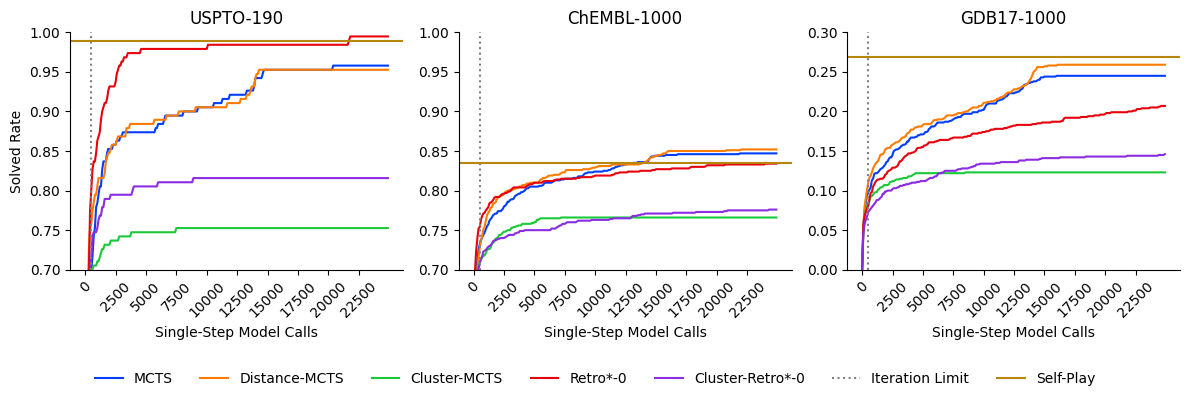

In [22]:

# Create a 1x3 subplot with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Iterate over each dataset and plot the solved rate per iteration
for i, dataset in enumerate(datasets):
    for algorithm in algorithm_order:
        subset = solved_rate_df[(solved_rate_df['dataset'] == dataset) & (solved_rate_df['algorithm'] == algorithm)]
        if not subset.empty:
            iteration_range = subset['expansion_iteration_range'].values[0]
            solved_rate_per_iteration = subset['solved_rate_per_expansion_call'].values[0]
            axs[i].plot(iteration_range, solved_rate_per_iteration, label=algorithm, color=algorithm_colors[algorithm])
    axs[i].set_xlabel('Single-Step Model Calls')
    #axs[i].set_ylabel('Solved Rate')
    axs[i].set_xticks(iteration_range[::25])  # Adjust the tick frequency for better readability
    axs[i].set_xticklabels(iteration_range[::25], rotation=45)
    axs[i].axvline(x=500, color='gray', linestyle='dotted', label='Iteration Limit')  # Add vertical dotted line at 500
    
    # Add golden lines
    if dataset == 'ChEMBL-1000':
        axs[i].axhline(y=0.835, color='#B8860B', linestyle='-', label='Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.843
    elif dataset == 'GDB17-1000':
        axs[i].axhline(y=0.269, color='#B8860B', linestyle='-', label='Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.274
    elif dataset == 'USPTO-190':
        axs[i].axhline(y=0.9895, color='#B8860B', linestyle='-', label='Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.9736
    
    if dataset in ['ChEMBL-1000']:
        axs[i].set_title("ChEMBL-1000")
        axs[i].set_ylim(0.7, 1)
    if dataset in ['GDB17-1000']:
        axs[i].set_title("GDB17-1000")
        axs[i].set_ylim(0, 0.3)
    if dataset in ['USPTO-190']:
        axs[i].set_title("USPTO-190")
        axs[i].set_ylabel('Solved Rate')
        axs[i].set_ylim(0.7, 1)

# Despine the plot
sns.despine()

# Create a single legend for all subplots
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(solved_rate_df['algorithm'].unique()) + 2, frameon=False)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legend

# save the plot as pdf
plt.savefig(f"{save_path}/1_single_step_model_calls_emolecules.pdf", bbox_inches='tight')

plt.show()

# appendix statistics

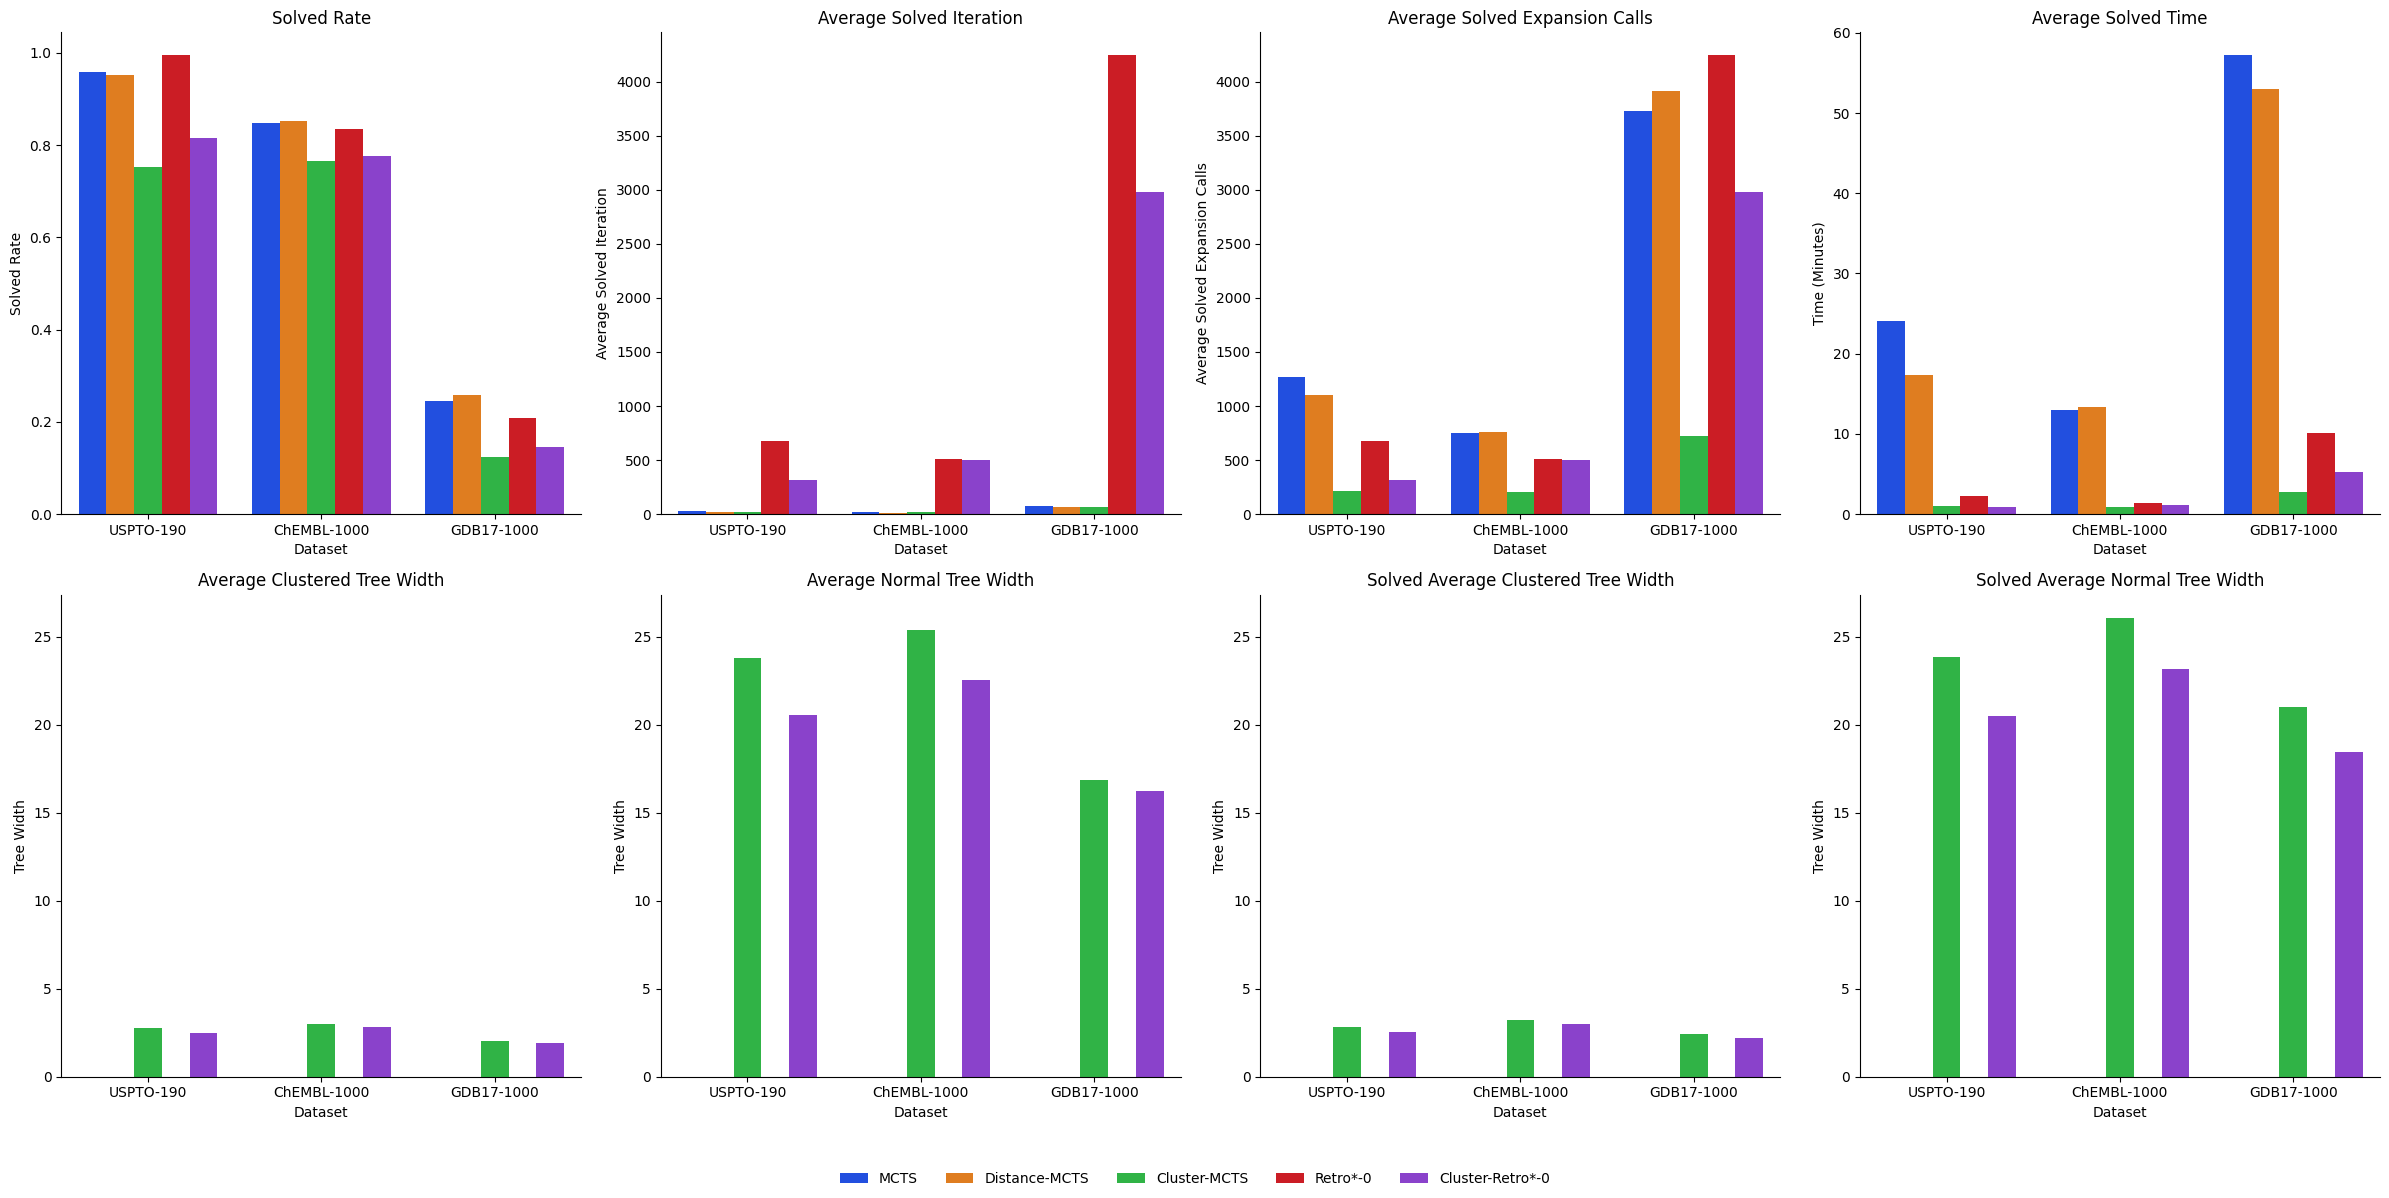

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new dataframe for average statistics
average_stats_df = solved_rate_df.groupby(['dataset', 'algorithm']).agg({
    'solved_rate': 'mean',
    'average_solved_iteration': 'mean',
    'average_solved_time': 'mean',
    'average_expansion_calls': 'mean',
    'average_solved_expansion_calls': 'mean',
    'average_clustered_tree_width': 'mean',
    'average_normal_tree_width': 'mean',
    'solved_average_clustered_tree_width': 'mean',
    'solved_average_normal_tree_width': 'mean'
}).reset_index()

average_stats_df['dataset'] = pd.Categorical(average_stats_df['dataset'], categories=datasets, ordered=True)
average_stats_df['algorithm'] = pd.Categorical(average_stats_df['algorithm'], categories=algorithm_order, ordered=True)
average_stats_df = average_stats_df.sort_values(['dataset', 'algorithm'])

# Define the statistics to plot
stats = [
    'solved_rate', 
    'average_solved_iteration', 
    'average_solved_expansion_calls', 
    'average_solved_time',
    'average_clustered_tree_width',
    'average_normal_tree_width',
    'solved_average_clustered_tree_width',
    'solved_average_normal_tree_width'
]

# Create a 2x4 subplot
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each statistic and create a bar plot
for i, stat in enumerate(stats):
    sns.barplot(x='dataset', y=stat, hue='algorithm', data=average_stats_df, ax=axs[i], palette=algorithm_colors)
    axs[i].set_title(f'{stat.replace("_", " ").title()}')
    axs[i].set_xlabel('Dataset')
    if stat == 'average_solved_time':
        axs[i].set_ylabel('Time (Minutes)')
    elif 'clustered_tree_width' in stat or 'normal_tree_width' in stat:
        axs[i].set_ylabel('Tree Width')
    else:
        axs[i].set_ylabel(stat.replace("_", " ").title())
    sns.despine(ax=axs[i])

# Share y-axis for the second row and set consistent y-limits
second_row_axes = axs[4:]
max_ylim = max(ax.get_ylim()[1] for ax in second_row_axes)
for ax in second_row_axes:
    ax.set_ylim(0, max_ylim)
    ax.sharey(second_row_axes[0])

# Collect handles and labels for the legend
handles, labels = axs[0].get_legend_handles_labels()

# Remove individual legends
for ax in axs:
    ax.legend_.remove()

# Create a shared legend below the plots
fig.legend(handles, labels, loc='lower center', ncol=len(average_stats_df['algorithm'].unique()), frameon=False)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(f"{save_path}/1_single_step_model_calls_emolecules_summary_statistics_appendix.pdf", bbox_inches='tight')

plt.show()